In [58]:
import pandas as pd
import numpy as np
from plotnine import *

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [60]:
train.shape

(891, 12)

In [61]:
test.shape

(418, 12)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [63]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [64]:
train.pivot_table(index=["Pclass"], values = ['Survived'])

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [65]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
train['Survived'] = train['Survived'].astype('category')

In [67]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [68]:
(ggplot(train)
 + aes(x = 'Sex', y = 'Survived', fill = 'Embarked')
 + geom_col() #geom_point()
 + stat_smooth
)

TypeError: __radd__() missing 1 required positional argument: 'gg'

C:\Users\USER\Anaconda\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\USER\Anaconda\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\USER\Anaconda\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\USER\Anaconda\lib\site-packages\plotnine\stats\smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\USER\Anaconda\lib\site-packages\plotnine\stats\smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.wa

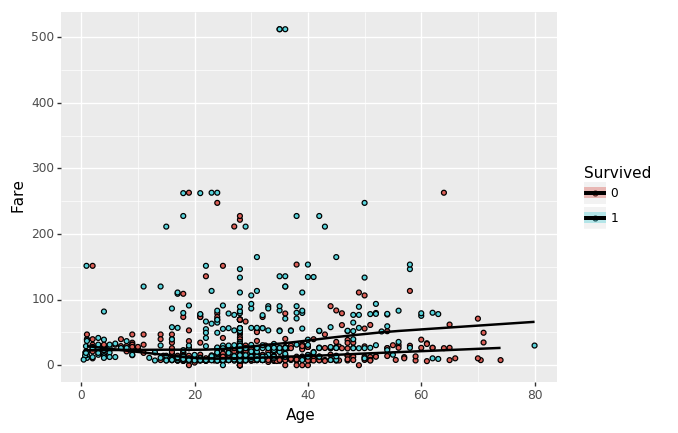

<ggplot: (28579959907)>

In [75]:
(ggplot(train)
 + aes(x = 'Age', y = 'Fare', fill='Survived')
 + geom_point()
 + stat_smooth()
)